In [4]:
import torch
import torch
torch.cuda.empty_cache()
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import math


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

batch_size = 10

img_transform = transform.Compose([transform.ToTensor(), transform.Normalize((0.5,),(0.5,))]) 

train_set = torchvision.datasets.ImageFolder('/home/jaoks/Desktop/proyecto6IA/dataset/train', transform=transform.ToTensor())
val_set = torchvision.datasets.ImageFolder('/home/jaoks/Desktop/proyecto6IA/dataset/val', transform=transform.ToTensor())

print(len(train_set))
print(len(val_set))



cuda:0
1370
340


0
torch.Size([3, 256, 256])
1
torch.Size([3, 256, 256])
****************************
3


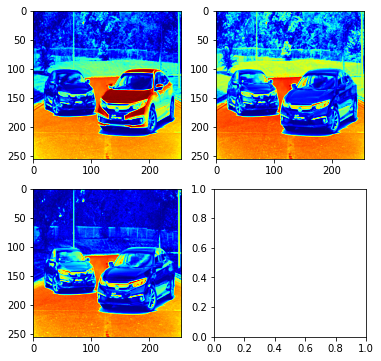

****************************
3


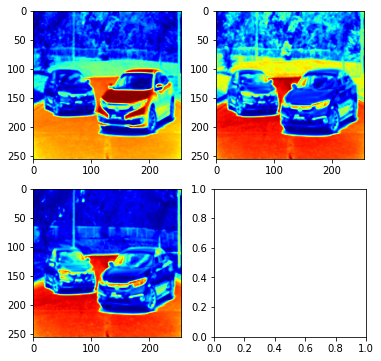

In [2]:
def Show_imgs (imgs, name, size = 3, color = True):
  color_m = 'jet'
  if color == False:
    color_m = 'gray'
  print ('***************' + name + '*************')
  img_numbers = imgs.shape[0]
  print(img_numbers)
  rows = cols = math.ceil(np.sqrt(img_numbers))

  fig = plt.figure(figsize=(rows*size, cols*size))
  for i in range (0, rows*cols):
    fig.add_subplot(rows, cols, i+1)
    if i<img_numbers:
      plt.imshow(imgs[i].detach(), cmap=color_m)
  plt.show()

img, label = train_set[0]
print(label) #label 0 means high resolution
print(img.shape)

img2, label2 = train_set[685]
print(label2)  #label 1 means low resolution
print(img2.shape)

Show_imgs(img, "")
Show_imgs(img2, "")


In [5]:
hd_resol_train = torch.utils.data.Subset(train_set, range(100))
low_resol_train = torch.utils.data.Subset(train_set, range(685, 785))

hd_resol_val = torch.utils.data.Subset(val_set, range(0, 10))
low_resol_val = torch.utils.data.Subset(val_set, range(170, 180))

#hd_resol_test = torch.utils.data.Subset(val_set, range(119, 170))
#low_resol_test = torch.utils.data.Subset(val_set, range(289, 340))

#train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
#val_loader = torch.utils.data.DataLoader(dataset=val_set, batch_size=batch_size, shuffle=False)


In [6]:
train_loader_low = torch.utils.data.DataLoader(dataset=low_resol_train, batch_size=batch_size, shuffle=True)
train_loader_hd = torch.utils.data.DataLoader(dataset=hd_resol_train, batch_size=batch_size, shuffle=True) 

val_loader_low =  torch.utils.data.DataLoader(dataset=low_resol_val, batch_size=batch_size, shuffle=True)
val_loader_hd =  torch.utils.data.DataLoader(dataset=hd_resol_val, batch_size=batch_size, shuffle=True)

#test_loader_low =  torch.utils.data.DataLoader(dataset=low_resol_test, batch_size=17, shuffle=True)
#test_loader_hd =  torch.utils.data.DataLoader(dataset=hd_resol_test, batch_size=17, shuffle=True)

In [5]:
iterator = iter(val_loader_low)
#print(type(iterator))
for data1, _ in val_loader_hd:
    data2 = next(iterator)
    #data2 = torch.stack(data2)
    data1 = data1.to(device)
    print(type(data1))
    print(data1.shape)
    print(type(data2[0]))
    print(data2[0].shape)
    data2[0].to(device)
    print(type(data2[1]))
    print(data2[1].shape)
    break
    

<class 'torch.Tensor'>
torch.Size([64, 3, 256, 256])
<class 'torch.Tensor'>
torch.Size([64, 3, 256, 256])
<class 'torch.Tensor'>
torch.Size([64])


In [6]:
conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=2, stride=1, padding=0)
conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2, stride=2, padding=1)
conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2, stride=2, padding=1)
conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, stride=2, padding=1)
tempimg, _ = train_set[0]
print(tempimg.shape)
tempimg = tempimg.unsqueeze(0)
print(tempimg.shape)
out_1 = F.relu(conv1(tempimg))
print(out_1.shape)
out1 = F.relu(conv2(out_1))
print(out1.shape)
out_3 = F.relu(conv3(out1))
print(out_3.shape)
out_4 = F.relu(conv4(out_3))
print(out_4.shape)
out1 = out_4.view(out1.size(0), -1)
fc = nn.Linear(in_features=256*33*33, out_features=1)
z = fc(out1)
print(z)

fcT = nn.Linear(in_features=1, out_features=256*33*33)
out1 = fcT(z)
#print(out1.shape)
out1 = out1.view(1, 256, 33, 33)
print(out1.shape)
convTran1 = nn.ConvTranspose2d(in_channels=512,out_channels=65, kernel_size=3, stride=2, padding=1)
convTran2 = nn.ConvTranspose2d(in_channels=193,out_channels=66, kernel_size=3, stride=2, padding=1)
convTran3 = nn.ConvTranspose2d(in_channels=66,out_channels=32, kernel_size=3, stride=2, padding=2)
convTran4 = nn.ConvTranspose2d(in_channels=96,out_channels=3, kernel_size=2, stride=1, padding=0)
print("SHAPE DECO")
#print(out1.shape)
print(out_4.shape)
out1 = torch.cat([out1, out_4], 1)
out1 = F.relu(convTran1(out1))

print(out1.shape)
print(out_3.shape)
out1 = torch.cat([out1, out_3], 1)
print("OUTPUT CONCAT OUT1 + OUT_3")
print(out1.shape)
out1 = F.relu(convTran2(out1))
print("AFTER CONVT2")
print(out1.shape)
out1 = F.relu(convTran3(out1))

print(out1.shape)
print("OUTPUT CONCAT OUT1 OUT_1")

out1 = torch.cat([out1, out_1], 1)
print(out1.shape)
out1 = F.relu(convTran4(out1))
print(out1.shape)

torch.Size([3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 64, 255, 255])
torch.Size([1, 64, 128, 128])
torch.Size([1, 128, 65, 65])
torch.Size([1, 256, 33, 33])
tensor([[0.0002]], grad_fn=<AddmmBackward0>)
torch.Size([1, 256, 33, 33])
SHAPE DECO
torch.Size([1, 256, 33, 33])
torch.Size([1, 65, 65, 65])
torch.Size([1, 128, 65, 65])
OUTPUT CONCAT OUT1 + OUT_3
torch.Size([1, 193, 65, 65])
AFTER CONVT2
torch.Size([1, 66, 129, 129])
torch.Size([1, 32, 255, 255])
OUTPUT CONCAT OUT1 OUT_1
torch.Size([1, 96, 255, 255])
torch.Size([1, 3, 256, 256])


In [7]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=2, stride=1, padding=0)
    self.bn1 = nn.BatchNorm2d(64)
    self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2, stride=2, padding=1)
    self.bn2 = nn.BatchNorm2d(64)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2, stride=2, padding=1)
    self.bn3 = nn.BatchNorm2d(128)
    self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, stride=2, padding=1)
    self.bn4 = nn.BatchNorm2d(256)
    self.fc = nn.Linear(in_features=256*33*33, out_features=1)

  def forward(self, image):
    out_1 = F.relu(self.bn1(self.conv1(image)))
    out = F.relu(self.bn2(self.conv2(out_1)))
    out_3 = F.relu(self.bn3(self.conv3(out)))
    out_4 = F.relu(self.bn4(self.conv4(out_3)))
    out = out_4.view(out_4.size(0), -1)
    z = self.fc(out)
    return z, out_1, out_3, out_4

class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.fc    = nn.Linear(in_features=1,out_features=256*33*33)
    self.convTran1 = nn.ConvTranspose2d(in_channels=512,out_channels=65, kernel_size=3, stride=2, padding=1)
    self.convTran2 = nn.ConvTranspose2d(in_channels=193,out_channels=66, kernel_size=3, stride=2, padding=1)
    self.convTran3 = nn.ConvTranspose2d(in_channels=66,out_channels=32, kernel_size=3, stride=2, padding=2)
    self.convTran4 = nn.ConvTranspose2d(in_channels=96,out_channels=3, kernel_size=2, stride=1, padding=0)
    
  def forward(self, latent, out_1, out_3, out_4):
    out = self.fc(latent)
    out = out.view(out.size(0), 256, 33, 33)
    out = torch.cat([out, out_4], 1)
    out = F.relu(self.convTran1(out))
    out = torch.cat([out, out_3], 1)
    out = F.relu(self.convTran2(out))
    out = F.relu(self.convTran3(out))
    out = torch.cat([out, out_1], 1)
    out = F.relu(self.convTran4(out))
    return out

In [8]:
class Autoencoder(nn.Module):
   def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

   def forward(self, x):
        latent, out_1, out_3, out_4 = self.encoder(x)
        x_recon = self.decoder(latent, out_1, out_3, out_4)
        return  x_recon

In [9]:
def train(model, train_loader, train_loader_hd, val_loader, val_loader_hd, Epochs, loss_fn):
    train_loss_avg = []
    val_loss_avg = []
    for epoch in range(Epochs):
        train_loss_avg.append(0)
        num_batches = 0
        iterator = iter(train_loader_hd)
        for image_batch, _ in train_loader:
            image_batch = image_batch.to(device)
            batch_list = next(iterator)
            image_batch_hd = batch_list[0].to(device)
            image_batch_recon = model(image_batch)
            loss = loss_fn(image_batch_recon, image_batch_hd)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
          
            train_loss_avg[-1] += loss.item()
            num_batches += 1
        
        train_loss_avg[-1] /= num_batches
        print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, Epochs, train_loss_avg[-1]))
        
        iterator = iter(val_loader_hd)
        val_loss_avg.append(0)
        num_batches=0
        for image_batch, _ in val_loader:
            image_batch = image_batch.to(device)
            batch_list = next(iterator)
            image_batch_hd = batch_list[0].to(device)
            image_batch_recon = model(image_batch)
            with torch.no_grad():
                loss = loss_fn(image_batch_recon, image_batch_hd)
                val_loss_avg[-1] += loss.item()
                num_batches += 1
        val_loss_avg[-1] /= num_batches
        print('Epoch [%d / %d] average reconstruction validation error: %f' % (epoch+1, Epochs, val_loss_avg[-1]))
                
    return train_loss_avg, val_loss_avg

In [10]:
capacity = 64
epochs = 10    
learning_rate = 0.001
autoencoder = Autoencoder()
autoencoder.to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate, weight_decay=1e-5)


loss_result, loss_val = train(autoencoder,train_loader_low, train_loader_hd, val_loader_low, val_loader_hd, epochs, loss_fn)

Epoch [1 / 10] average reconstruction error: 0.537096
Epoch [1 / 10] average reconstruction validation error: 0.292387
Epoch [2 / 10] average reconstruction error: 0.301906
Epoch [2 / 10] average reconstruction validation error: 0.292392
Epoch [3 / 10] average reconstruction error: 0.301909
Epoch [3 / 10] average reconstruction validation error: 0.292393
Epoch [4 / 10] average reconstruction error: 0.301909
Epoch [4 / 10] average reconstruction validation error: 0.292393
Epoch [5 / 10] average reconstruction error: 0.301910
Epoch [5 / 10] average reconstruction validation error: 0.292394
Epoch [6 / 10] average reconstruction error: 0.301910
Epoch [6 / 10] average reconstruction validation error: 0.292394
Epoch [7 / 10] average reconstruction error: 0.301910
Epoch [7 / 10] average reconstruction validation error: 0.292394
Epoch [8 / 10] average reconstruction error: 0.301910
Epoch [8 / 10] average reconstruction validation error: 0.292394
Epoch [9 / 10] average reconstruction error: 0.3

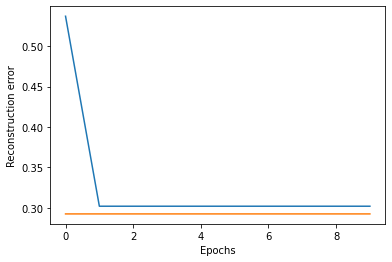

In [11]:
fig = plt.figure()
plt.plot(loss_result)
plt.plot(loss_val)
plt.xlabel('Epochs')
plt.ylabel('Reconstruction error')
plt.show()

In [17]:
for image_batch, _ in train_loader_low:
  image_batch = image_batch.to(device)
  image_batch_recon = autoencoder(image_batch)
  #Show_imgs(image_batch[0].cpu(),"")
  #Show_imgs(image_batch_recon[0].cpu(),"")
  #image_batch[0].cpu() 
  im = transform.ToPILImage()(image_batch[0]).convert("RGB")  
  display(im)
  imt = transform.ToPILImage()(image_batch_recon[0]).convert("RGB")
  display(imt) 
  break

RuntimeError: CUDA out of memory. Tried to allocate 160.00 MiB (GPU 0; 3.81 GiB total capacity; 1.86 GiB already allocated; 54.75 MiB free; 2.17 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
loss_test = 0
batch = 0
iterator = iter(test_loader_hd)
for image_batch,_ in test_loader_low:
    image_batch = image_batch.to(device)
    batch_list = next(iterator)
    image_batch_hd = batch_list[0].to(device)
    image_batch_recon = autoencoder(image_batch)
    with torch.no_grad():
        loss_ = loss_fn(image_batch_recon, image_batch_hd)
        loss_test+= loss_.item()
        batch += 1
print(loss_test/batch)

In [ ]:
def Show(out, title = ''):
  print(title)
  out = out.permute(1,0,2,3)
  grilla = torchvision.utils.make_grid(out,10,5)
  plt.imshow(transforms.ToPILImage()(grilla), 'jet')
  plt.show()

def Show_Weight(out):
  grilla = torchvision.utils.make_grid(out)
  plt.imshow(transform.ToPILImage()(grilla), 'jet')
  plt.show()

In [ ]:
#autoencoder.eval()


#tensor = torch.zeros(len(test_loader),10)


#with torch.no_grad():

#  image,label = iter(test_loader).next()
#  image,label = iter(test_loader).next()
#  image = image.to(device)
#  z = autoencoder.encoder(image)
#  z = z.to('cpu')
#  mean = z.mean(dim=0)

#  std = (z - mean).pow(2).mean(dim=0).sqrt()
  
#  z1 = torch.randn(1000, latent_dims)*std + mean
#  z1 = z1.to(device)
#  decodificado = autoencoder.decoder(z1)
 
  
 
#  decodificado = decodificado.to('cpu')

#  fig, ax = plt.subplots(figsize=(25, 25))
#  Show_Weight(decodificado[1:1000])
#  plt.show()